In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load training data
train = pd.read_csv('Data/train.csv');

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Qualitative Attributes:** PassengerId, Survived, Pclass, Sex, Ticket, Cabin & Embarked.

**Quantitative Attributes:** SlibSp, Parch & Fare.

In [2]:
#load test data
test = pd.read_csv('Data/test.csv');

test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
complete_set = [train, test]

for data in complete_set:
    print(pd.isnull(data).sum())
    print('........................')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
........................
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
........................


**PassengerId** is a Nominal attribute, this means if we reassign all passengers ids, it will not make any difference on the data set hence we can ignore this for now.

**Survived** is target attribute.

**Pclass** is numeric attribute and it does not have any missing value, lets check it’s impact on target attribute.

In [4]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Here we have taken mean, this data represents that Pclass=1 survival rate is 62.96%.

**Sex** attribute is categorical attribute having values male or female and does not have missing values.

In [5]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


**Females** are more secure, Female survival rate is more than male.

**SibSp** is a numerical attribute represents the siblings/spouse.

In [6]:
print(train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


**Parch** is also numerical attribute represents the children/parents.

In [7]:
print(train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


**Family Size**

Based on the impact of SibSp & Parch, lets create a new attribute called Family size.

In [8]:
for data in complete_set:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


This seems to have a good effect on our prediction, lets check if what is the effect of being alone on this ship and create another attribute called **IsAlone**.

In [9]:
for data in complete_set:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


**Embarked** attribute is having missing values, best way to fill this would be by most occurred value. In this data set most occurred value for Embarked attribute is ‘S’.

In [10]:
for data in complete_set:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


**Fare** is a numeric attribute and it has missing values too. In case of Fare, filling missing values with median will be better choice than mean. It is a numeric attribute hence we need to convert this to categorical attribute to make it ready for ML algorithms we are going to use. Here we have categorized fare into 4 categories.

In [11]:
for data in complete_set:
    data['Fare'] = data['Fare'].fillna(train['Fare'].median())
    
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

print(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


**Age** is also a numeric attribute and having missing values. Filling the missing values in age attribute is tricky one. We are generating random numbers between (mean — std) and (mean + std) and filling the same. We categorized age into 5 range.

In [12]:
for data in complete_set:
    age_avg = data['Age'].mean()
    age_std = data['Age'].std()
    age_null_count = data['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    
    data['Age'][np.isnan(data['Age'])] = age_null_random_list
    data['Age'] = data['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print(train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.522124
1   (16.0, 32.0]  0.350562
2   (32.0, 48.0]  0.379447
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Name**, could have been ignored but if you look closely names has titles which can have impact on target attribute. Lets cross check the same.

In [13]:
for data in complete_set:
    data['Title'] = ''
    data['Title']=data['Name'].str.extract('([A-Za-z]+)\.')
    
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()) 
#train.head()

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [14]:
for data in complete_set:
    #Mapping dummies for Sex
    data['Sex'] = data['Sex'].map({'female':0, 'male':1}).astype(int)
    
    #Mapping dummies for Titles
    title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    
    #Mapping dummies for Embarked
    data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
    
    #Mapping dummies for Fare
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(float)
    
    #Mapping dummies for Age
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[data['Age'] > 64, 'Age'] = 4
    
#Feature Selection
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
train.drop(drop_elements, axis=1, inplace=True)
train.drop(['CategoricalAge', 'CategoricalFare', 'PassengerId'], axis=1, inplace=True)
test.drop(drop_elements, axis=1, inplace=True)
    

In [15]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1,0.0,0,0,1
1,1,1,0,2,3.0,1,0,3
2,1,3,0,1,1.0,0,1,2
3,1,1,0,2,3.0,0,0,3
4,0,3,1,2,1.0,0,1,1


In [16]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,892,3,1,2,0.0,2,1,1
1,893,3,0,2,0.0,0,0,3
2,894,2,1,3,1.0,2,1,1
3,895,3,1,1,1.0,0,1,1
4,896,3,0,1,1.0,0,0,3


Now the data looks clean.

### Train Test  Split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.40, 
                                                    random_state=101)

### Trying out different classifiers to get a optimal result

### 1. Logistic

In [18]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[183  24]
 [ 53  97]]


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       207
           1       0.80      0.65      0.72       150

   micro avg       0.78      0.78      0.78       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.78      0.78       357



0.7843137254901961


c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Naive Bayes


In [19]:
from sklearn.naive_bayes import MultinomialNB

NBModel = MultinomialNB().fit(X_train,y_train)

predictions = NBModel.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[180  27]
 [ 67  83]]


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       207
           1       0.75      0.55      0.64       150

   micro avg       0.74      0.74      0.74       357
   macro avg       0.74      0.71      0.72       357
weighted avg       0.74      0.74      0.73       357



0.7366946778711485


### 3.SVC

In [20]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[200   7]
 [ 58  92]]


              precision    recall  f1-score   support

           0       0.78      0.97      0.86       207
           1       0.93      0.61      0.74       150

   micro avg       0.82      0.82      0.82       357
   macro avg       0.85      0.79      0.80       357
weighted avg       0.84      0.82      0.81       357



0.8179271708683473


c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**SVM using Grid Search**

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(), param_grid, verbose=3)

grid.fit(X_train, y_train)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6573033707865169, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6910112359550562, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6910112359550562, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8146067415730337, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7415730337078652, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7640449438202247, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] .... C=100, gamma=0.0001, score=0.7471910112359551, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.7584269662921348, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8258426966292135, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.7640449438202247, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.7921348314606742, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8370786516853933, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7640449438202247, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
grid_predections = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predections))
print('\n')
print(classification_report(y_test, grid_predections))
print('\n')
print(accuracy_score(y_test,grid_predections))

[[197  10]
 [ 52  98]]


              precision    recall  f1-score   support

           0       0.79      0.95      0.86       207
           1       0.91      0.65      0.76       150

   micro avg       0.83      0.83      0.83       357
   macro avg       0.85      0.80      0.81       357
weighted avg       0.84      0.83      0.82       357



0.8263305322128851


In [31]:
#test_temp = test.drop('PassengerId', axis=1)
#predictions = grid.predict(test_temp)
#df = pd.concat([test['PassengerId'], pd.DataFrame(predictions, columns= ['Survived'])], axis=1)
#df.to_csv('Survival', index=False)

#train.head()

In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,892,3,1,2,0.0,2,1,1
1,893,3,0,2,0.0,0,0,3
2,894,2,1,3,1.0,2,1,1
3,895,3,1,1,1.0,0,1,1
4,896,3,0,1,1.0,0,0,3


### 4. RFC

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test,rfc_pred))

[[181  26]
 [ 44 106]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.84       207
           1       0.80      0.71      0.75       150

   micro avg       0.80      0.80      0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357



0.803921568627451


### 5. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))
print('\n')
print(accuracy_score(y_test,knn_pred))

[[177  30]
 [ 48 102]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       207
           1       0.77      0.68      0.72       150

   micro avg       0.78      0.78      0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357



0.7815126050420168


In [35]:
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

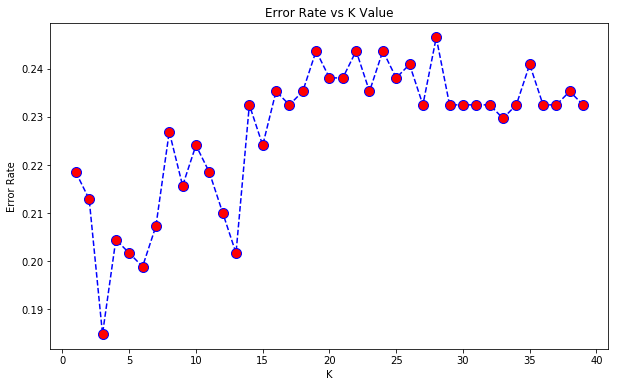

In [36]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))
print('\n')
print(accuracy_score(y_test,knn_pred))

[[186  21]
 [ 51  99]]


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       207
           1       0.82      0.66      0.73       150

   micro avg       0.80      0.80      0.80       357
   macro avg       0.80      0.78      0.79       357
weighted avg       0.80      0.80      0.79       357



0.7983193277310925
